# Web Scraping & Exploratory Data Analysis <br/> with Python

## Introduction

For this project, we will analyze data of vegetables and their nutrients, taken from this [FDA website](https://www.fda.gov/food/food-labeling-nutrition/nutrition-information-raw-vegetables) to determine the **number one vegetable** to plant. Apart from one small exception, we will only use this data for our analysis, i.e. we are not taking into account other very benefical information (like vegetable grow times, food preparation, etc.) to keep this project from being too long.

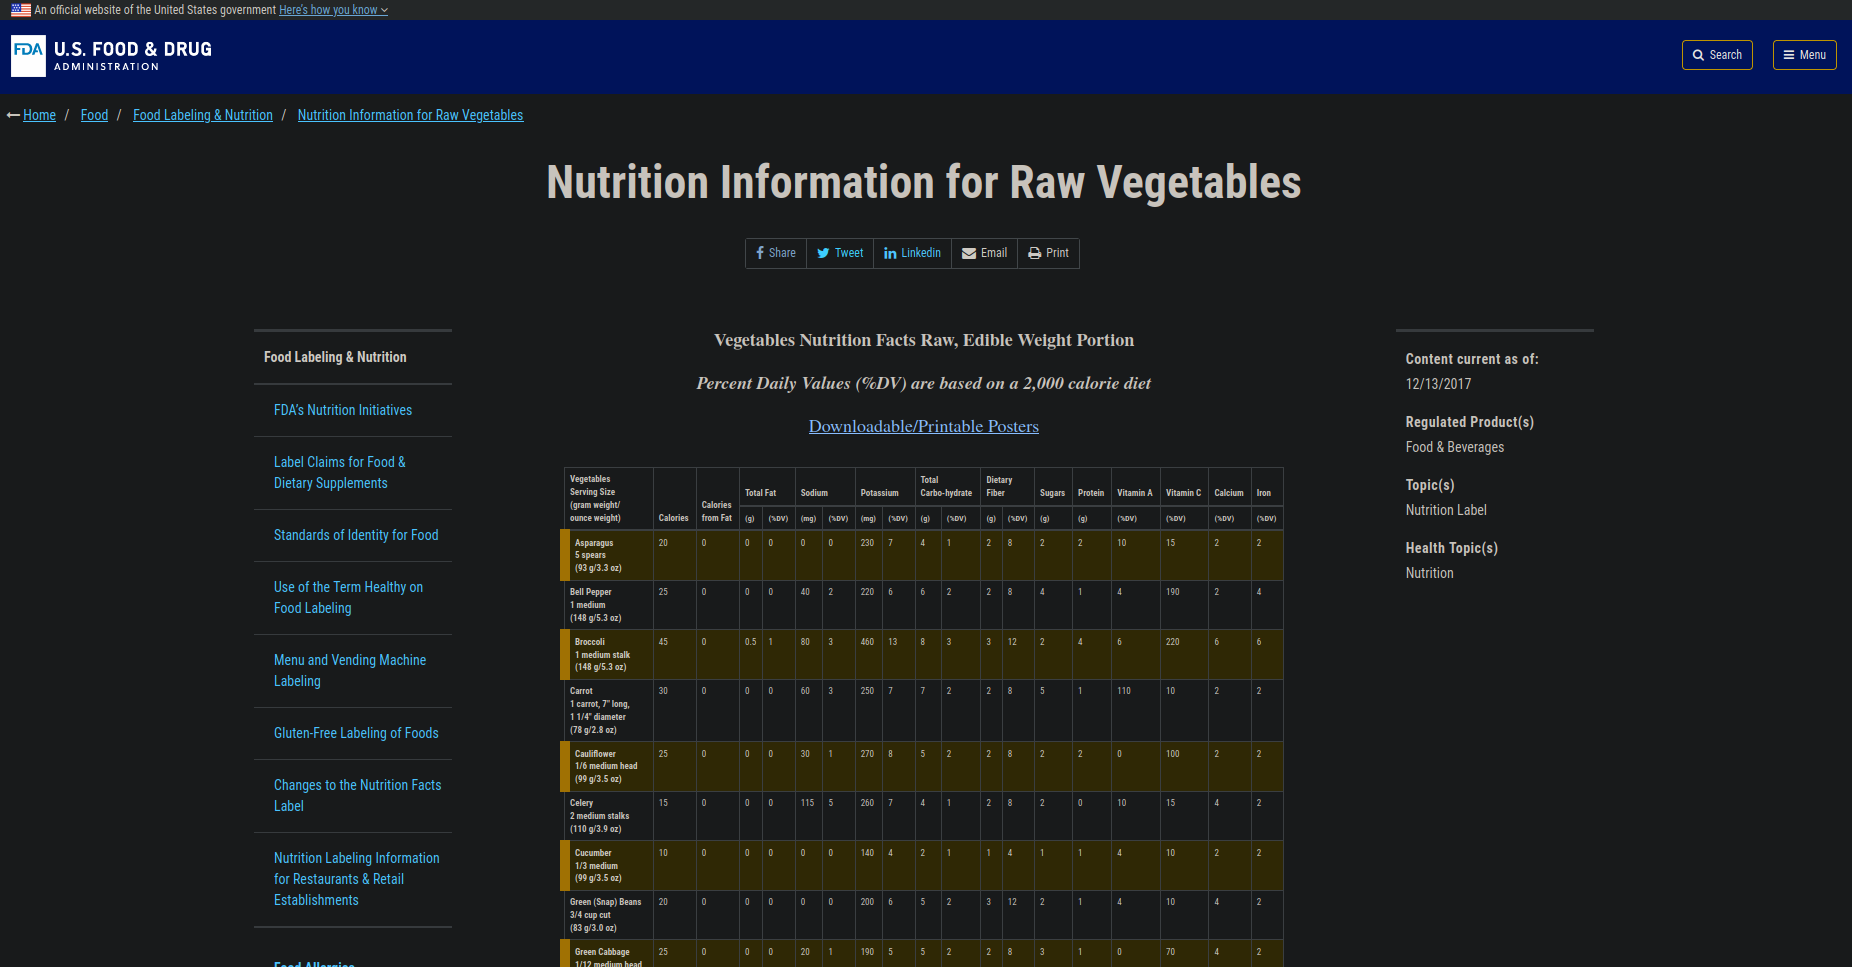

## Web Scraping

With the help of the powerful python library **BeautifulSoup** we will retrieve first both of the headers (header_names & header_units), combine them into one unified header, then extract the actual table cell data and finally combine it all in a **pandas dataframe**.

In [178]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import seaborn as sns                       
import matplotlib.pyplot as plt
import requests

In [179]:
try:
    source = requests.get('https://www.fda.gov/food/food-labeling-nutrition/nutrition-information-raw-vegetables')
    source.raise_for_status() #this will raise an error should the website be offline
    
    soup = BeautifulSoup(source.text,'html.parser')
    
    
# Header Names    
    header_names = soup.find('thead').find('tr', valign='top')
    header_list=[]
    for header in header_names:
        if header.text != '\n':
            h=header.text
            h=h.replace('\n\t\t\t',' ')
            header_list.append(h)
    
    
# Header Units    
    header_units = soup.find('thead').find('tr', class_='text-center').find_all('th')
    unit_list=[]
    for unit in header_units:
        u=unit.text
        u = u.replace('(', '')
        u = u.replace(')', '')
        unit_list.append(u)   
    
    
# Allocate header names & units to one header list
    Header=[]
    for i in [0,1,2]:
        Header.append(header_list[i])
    for i in [3,4,5,6,7]:
        for j in [0,1]:
            Header.append(header_list[i]+' in '+unit_list[2*(i-3)+j])
    for i in [8,9,10,11,12,13]:
        Header.append(header_list[i]+' in '+unit_list[i+2])
       
    
# Retrieve table cell data 
    vegetables = soup.find('tbody').find_all('tr')
    vegetable_lists = []
    for vegetable in vegetables:
        vegetable_lists.append([])
        h=vegetable.find('th').text
        h=h.replace('\n\t\t\t',' ')
        vegetable_lists[vegetables.index(vegetable)].append(h)
        for number in vegetable.find_all('td'):
            vegetable_lists[vegetables.index(vegetable)].append(number.text)
    df = pd.DataFrame(vegetable_lists, columns=Header)

    
except Exception as e:
    print(e)
    

# Show the dataframe    
df

,Vegetables Serving Size (gram weight/ ounce weight),Calories,Calories from Fat,Total Fat in g,Total Fat in %DV,Sodium in mg,Sodium in %DV,Potassium in mg,Potassium in %DV,Total Carbo-hydrate in g,Total Carbo-hydrate in %DV,Dietary Fiber in g,Dietary Fiber in %DV,Sugars in g,Protein in g,Vitamin A in %DV,Vitamin C in %DV,Calcium in %DV,Iron in %DV
0,Asparagus 5 spears (93 g/3.3 oz),20,0,0,0,0,0,230,7,4,1,2,8,2,2,10,15,2,2
1,Bell Pepper 1 medium (148 g/5.3 oz),25,0,0,0,40,2,220,6,6,2,2,8,4,1,4,190,2,4
2,Broccoli 1 medium stalk (148 g/5.3 oz),45,0,0.5,1,80,3,460,13,8,3,3,12,2,4,6,220,6,6
3,"Carrot 1 carrot, 7"" long, 1 1/4"" diameter (78 ...",30,0,0,0,60,3,250,7,7,2,2,8,5,1,110,10,2,2
4,Cauliflower 1/6 medium head (99 g/3.5 oz),25,0,0,0,30,1,270,8,5,2,2,8,2,2,0,100,2,2
5,Celery 2 medium stalks (110 g/3.9 oz),15,0,0,0,115,5,260,7,4,1,2,8,2,0,10,15,4,2
6,Cucumber 1/3 medium (99 g/3.5 oz),10,0,0,0,0,0,140,4,2,1,1,4,1,1,4,10,2,2
7,Green (Snap) Beans 3/4 cup cut (83 g/3.0 oz),20,0,0,0,0,0,200,6,5,2,3,12,2,1,4,10,4,2
8,Green Cabbage 1/12 medium head (84 g/3.0 oz),25,0,0,0,20,1,190,5,5,2,2,8,3,1,0,70,4,2
9,Green Onion 1/4 cup chopped (25 g/0.9 oz),10,0,0,0,10,0,70,2,2,1,1,4,1,0,2,8,2,2


### Looking at the data, it helps to narrow down which columns are of interest to us:

The most important nutrient should be **total carbohydrates**, because they essentially represent the amount of energy we get from eating them which is the most fundamental purpose of eating itself.<br/>
<br/>
After that comes the **sugars** which influence the taste, so the pleasure of consumption.<br/>
<br/>
Third is **protein**, for building muscle and more importantly for energy levels & concentration.<br/>
<br/>
Fourth are the vitamins, **vitamin A & C**.<br/>
<br/>
Lastly we have **potassium** which is present and available in a high enough concentration to be relevant.<br/>
<br/>
We will exclude the following columns:<br/>
*Calories* - they are essentially the same as the total carbohydrates<br/>
*Total Fat* - there is not enough fat, the only significant amount is found in Corn (4%DV) which we will get back to in the end<br/>
*Sodium* - negligible amounts and not important enough<br/>
*Dietary Fiber* - not important enough to make the list<br/>
*Calcium* - not important enough to make the list


## Cleaning the data

First we notice the biggest eyesore which is the row indexes being very convoluted. But, before we do that we first need to decide if we want to use the grams or the percentage Daily Value (%DV) for our eventual comparisons. We will use the latter, because the vitamins are not available in grams and %DV is a better metric for comparison. The only problem we will run into here are our values for protein & sugar which are only given in grams. For this we will make an exception and use other outside information. We will use the **daily value for protein & sugar of 50g** from this [website](https://www.fda.gov/media/135301/download) to calculate the %DV for both. After that we will clean up the indexes.

In [180]:
# Convert 'Protein in g' & 'Sugars in g' into 'Protein in %DV' & 'Sugars in %DV'
for i in range(len(df)):
    df.at[i, 'Protein in g'] = int(float(df['Protein in g'][i])/50*100)
    df.at[i, 'Sugars in g'] = int(float(df['Sugars in g'][i])/50*100)
    
    
# Drop all the columns with grams in them, as well as the nutrients we excluded earlier
df.drop(['Calories','Calories from Fat','Total Fat in %DV','Total Fat in g','Sodium in mg',
         'Sodium in %DV','Potassium in mg','Total Carbo-hydrate in g','Dietary Fiber in g','Dietary Fiber in %DV',
         'Calcium in %DV','Iron in %DV'], axis=1, inplace=True)

In [181]:
# Cleaning up the column 'Vegetables' and renaming Protein and Sugars
df.rename(columns={'Vegetables Serving Size (gram weight/ ounce weight)':'Vegetables', 
                   'Protein in g':'Protein in %DV', 'Sugars in g':'Sugars in %DV', 
                   'Total Carbo-hydrate in %DV':'Carbs in %DV'}, inplace=True)

xlabels=['placeholder']
row_labels=df['Vegetables'].astype('string')

                    
# Detecting numbers in the Vegetable names to only select the characters of the strings that go before
for i in row_labels:
    s=''
    b=''    
    for a in i.split(' '):
        if a.isnumeric() is False:
            b=b+' '+a
        else:
            xlabels.append(b)
            break
    if xlabels[-1]!=b:
        xlabels.append(b)
xlabels.pop(0)

                    
# Manual renaming of some of the names is unfortunately needed
xlabels[4]=' Cauliflower'
xlabels[6]=' Cucumber'
xlabels[7]=' Green (Snap) Beans'
xlabels[8]=' Green Cabbage'
xlabels[9]=' Green Onion'
xlabels[10]=' Iceberg Lettuce'
xlabels[16]=' Summer Squash'
xlabels[17]=' Corn'



for i in range(len(xlabels)):
    xlabels[i]=xlabels[i][1:]
    df.at[i,'Vegetables']=xlabels[i]

df=df.reindex(columns=['Vegetables', 'Carbs in %DV','Sugars in %DV','Protein in %DV',
       'Vitamin A in %DV', 'Vitamin C in %DV', 'Potassium in %DV'])

# Show the dataframe
df

,Vegetables,Carbs in %DV,Sugars in %DV,Protein in %DV,Vitamin A in %DV,Vitamin C in %DV,Potassium in %DV
0,Asparagus,1,4,4,10,15,7
1,Bell Pepper,2,8,2,4,190,6
2,Broccoli,3,4,8,6,220,13
3,Carrot,2,10,2,110,10,7
4,Cauliflower,2,4,4,0,100,8
5,Celery,1,4,0,10,15,7
6,Cucumber,1,2,2,4,10,4
7,Green (Snap) Beans,2,4,2,4,10,6
8,Green Cabbage,2,6,2,0,70,5
9,Green Onion,1,2,0,2,8,2


## Narrowing down the vegetables

Now we want to narrow down the vegetables, We can do this by finding the top 3 vegetables of each nutrient and give points as the priority of the nutrient divided by the ranking:<br/>
<br/>
**Ranking**<br/>
5 points: Carbs<br/>
4 points: Sugars<br/>
3 points: Protein<br/>
2 points: Vitamin A & C<br/>
1 point: Potassium<br/>
<br/>
Points: Priority/Ranking<br/>
Example: 2nd place for Protein: 3/2 = 1.5 points<br/>
<br/>
**Disclaimer**: This is no exact scientific method, but just a way to filter out the vegetables roughly.
<br/> <br/>
We do this to narrow it down to our final 5 vegetables which we will eventually visually compare to get the top vegetable.

In [182]:
points = pd.Series(0.0,range(20))


# Carbs
largest = df['Carbs in %DV'].astype(float).nlargest(20)
for i in range(len(df)):
    if largest[2+i]!=largest[2]:
        largest=largest.iloc[:2+i]
        break
for i in range(len(largest)):
        points[largest.index[i]] = points[largest.index[i]] + 5/(i+1)

        
# Sugars
largest = df['Sugars in %DV'].astype(float).nlargest(20)
for i in range(len(df)):
    if largest[2+i]!=largest[2]:
        largest=largest.iloc[:2+i]
        break
for i in range(len(largest)):
        points[largest.index[i]] = points[largest.index[i]] + 4/(i+1)


# Protein
largest = df['Protein in %DV'].astype(float).nlargest(20)
for i in range(len(df)):
    if largest[2+i]!=largest[2]:
        largest=largest.iloc[:2+i]
        break
for i in range(len(largest)):
        points[largest.index[i]] = points[largest.index[i]] + 3/(i+1)


# Vitamin A
largest = df['Vitamin A in %DV'].astype(float).nlargest(20)
for i in range(len(df)):
    if largest[2+i]!=largest[2]:
        largest=largest.iloc[:2+i]
        break
for i in range(len(largest)):
        points[largest.index[i]] = points[largest.index[i]] + 2/(i+1)


# Vitamin C
largest = df['Vitamin C in %DV'].astype(float).nlargest(20)
for i in range(len(df)):
    if largest[2+i]!=largest[2]:
        largest=largest.iloc[:2+i]
        break
for i in range(len(largest)):
        points[largest.index[i]] = points[largest.index[i]] + 2/(i+1)


# Potassium
largest = df['Potassium in %DV'].astype(float).nlargest(20)
for i in range(len(df)):
    if largest[2+i]!=largest[2]:
        largest=largest.iloc[:2+i]
        break
for i in range(len(largest)):
        points[largest.index[i]] = points[largest.index[i]] + 1/(i+1)

        
# Making sure there that there are no duplicate rankings
largest = points.nlargest(20)
for i in range(len(points)):
    if largest[4+i]!=largest[4]:
        largest=largest.iloc[:4+i]
        break


# Show the results
for i in largest.index:
    print(df['Vegetables'][i])

Potato
Sweet Potato
Broccoli
Onion
Corn


### This gives us our final 5 vegetables: Potato, Sweet Potato, Broccoli, Onion and Corn. Finally, we will make a visual comparison to find the best vegetable.

,Vegetables,Carbs in %DV,Sugars in %DV,Protein in %DV,Vitamin A in %DV,Vitamin C in %DV,Potassium in %DV
0,Broccoli,3,4,8,6,220,13
1,Onion,4,18,2,0,20,5
2,Potato,9,2,6,0,45,18
3,Corn,6,10,8,2,10,7
4,Sweet Potato,8,14,4,120,30,13


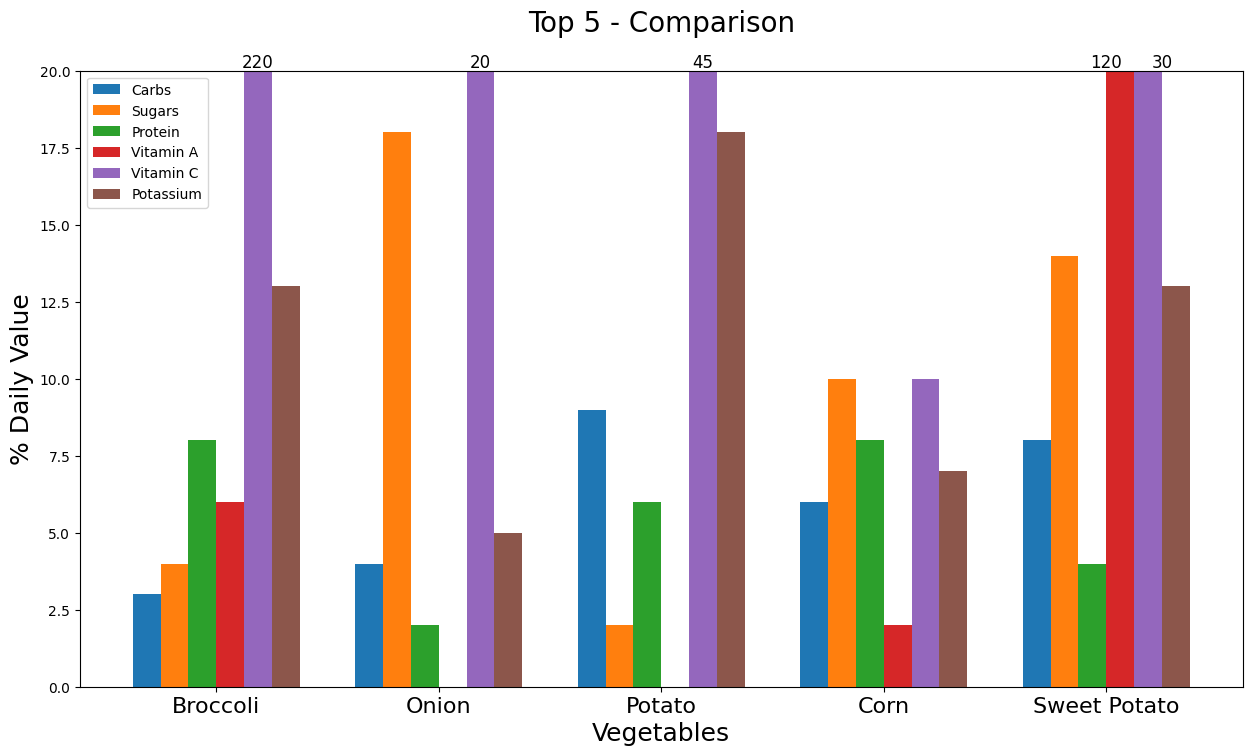

In [183]:
# First we drop the vegetables we don't need

df.set_index('Vegetables', inplace=True)
df.drop(['Asparagus', 'Cauliflower', 'Bell Pepper', 'Celery', 'Cucumber', 'Green (Snap) Beans', 'Green Cabbage', 'Green Onion', 'Iceberg Lettuce', 'Leaf Lettuce', 'Radishes', 'Summer Squash', 'Tomato', 'Carrot', 'Mushrooms'], axis=0, inplace=True)
df=df.astype(int)
df=df.reset_index()


# Now we plot them
fig, ax1 = plt.subplots(figsize=(15, 8))

x = np.arange(len(df))
width = 0.5/4     #The width of the bars

for i in range(df.shape[1]-1):
    plt.bar(x-width/2-2*width+i*width, df[df.columns[i+1]], width)

plt.text(0+1.5*width,20.1, '220',
        verticalalignment='baseline', horizontalalignment='center',
        color='black', fontsize=12)

plt.text(1+1.5*width,20.1, '20',
        verticalalignment='baseline', horizontalalignment='center',
        color='black', fontsize=12)

plt.text(2+1.5*width,20.1, '45',
        verticalalignment='baseline', horizontalalignment='center',
        color='black', fontsize=12)

plt.text(4+0*width,20.1, '120',
        verticalalignment='baseline', horizontalalignment='center',
        color='black', fontsize=12)

plt.text(4+2*width,20.1, '30',
        verticalalignment='baseline', horizontalalignment='center',
        color='black', fontsize=12)


plt.ylim(0,20)
plt.xticks(x,df['Vegetables'], fontsize=16)
ax1.set_title('Top 5 - Comparison',y=1.05, fontsize=20)
ax1.set_ylabel('% Daily Value', fontsize=18)
ax1.set_xlabel('Vegetables', fontsize=18)
listlegend=[]
for i in df.columns[1:]:
    listlegend.append(i[:-7])
plt.legend(listlegend)

# Show the dataframe
df

## Conclusion

Looking at this graph, we can see that our number one vegetable has to be the **sweet potato**. It is the most well rounded vegetable, with only protein being relatively low. Every other nutrient is very high, that combined with it being 2nd place when it comes to carbs & sugars, makes this the **top vegetable**.<br/>
<br/>
A close runner up is **broccoli**. It is a good all-rounder with it's incredible Vitamin C and it's only disadvantage being the low carbs and sugars.<br/>
<br/>
Another close runner-up & special case is **corn**. Vitamin A and C might be low for it, but everything else is considerably high, with one special feature being that it is the only vegetable with significant amounts of fat.

